In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [3]:
data = pd.read_csv('/Users/LENOVO/OneDrive/Desktop/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

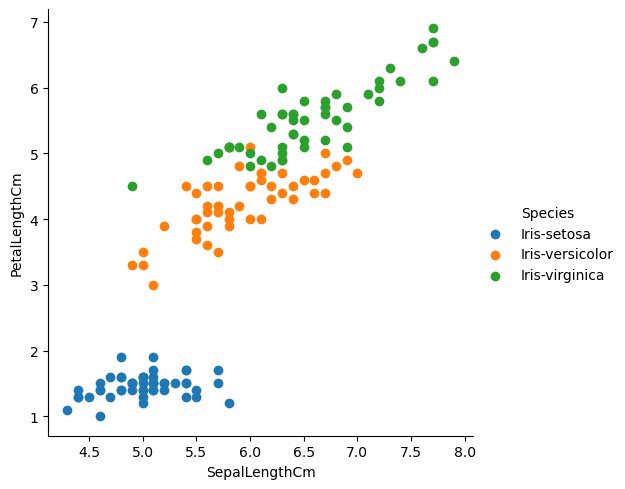

In [7]:
sns.FacetGrid(data,hue="Species",height=5).map(plt.scatter,"SepalLengthCm","PetalLengthCm").add_legend()

In [8]:
data["PetalWidthCm"].value_counts()

PetalWidthCm
0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
0.4     7
1.0     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
1.1     3
2.4     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [9]:
data["SepalWidthCm"].value_counts()

SepalWidthCm
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
3.7     3
3.6     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64

In [10]:
x = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
y = data[["Species"]].values

In [11]:
Model = LogisticRegression()
Model.fit(x,y)

C:\Users\LENOVO\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [12]:
round(Model.score(x,y), 2)

0.97

In [13]:
Actual = y
predicted = Model.predict(x)

In [14]:
from sklearn import metrics
print(metrics.classification_report(Actual,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [15]:
print(metrics.confusion_matrix(Actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [16]:
predicted=Model.predict([[5.1,3.5,1.4,0.2]])
predicted

array(['Iris-setosa'], dtype=object)

In [17]:
dup = data.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [18]:
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  150
Number of columns are:  6


In [19]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
data.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


In [22]:
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Id is 150
No. of unique values in SepalLengthCm is 35
No. of unique values in SepalWidthCm is 23
No. of unique values in PetalLengthCm is 43
No. of unique values in PetalWidthCm is 22
No. of unique values in Species is 3


In [23]:
data=data.iloc[:,1:]

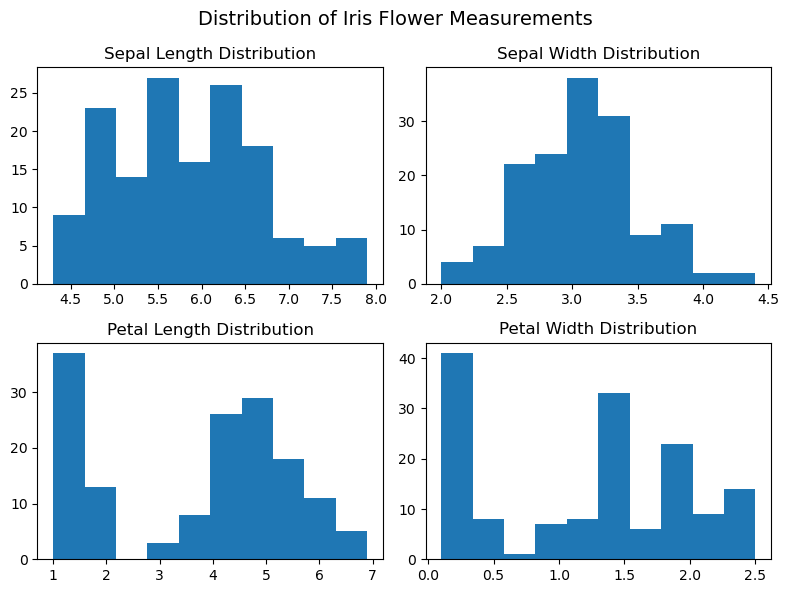

In [24]:
plt.figure(figsize=(8, 6))
plt.suptitle('Distribution of Iris Flower Measurements', fontsize=14)

# Create a 2x2 grid of subplots
plt.subplot(2, 2, 1)  # Subplot 1 (Top-Left)
plt.hist(data['SepalLengthCm'])
plt.title('Sepal Length Distribution')

plt.subplot(2, 2, 2)  # Subplot 2 (Top-Right)
plt.hist(data['SepalWidthCm'])
plt.title('Sepal Width Distribution')

plt.subplot(2, 2, 3)  # Subplot 3 (Bottom-Left)
plt.hist(data['PetalLengthCm'])
plt.title('Petal Length Distribution')

plt.subplot(2, 2, 4)  # Subplot 4 (Bottom-Right)
plt.hist(data['PetalWidthCm'])
plt.title('Petal Width Distribution')

# Display the subplots
plt.tight_layout()  # Helps in adjusting the layout
plt.show()
     

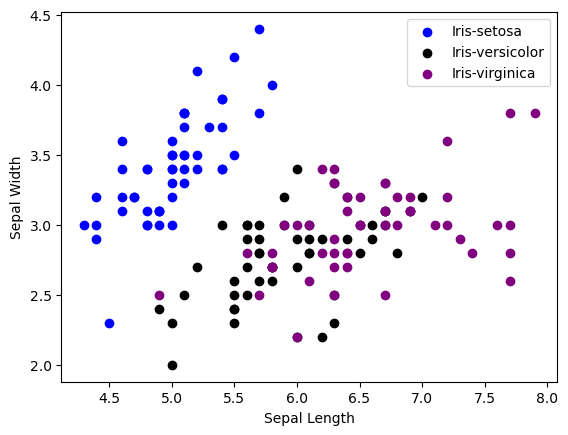

In [25]:
colors = ['blue', 'black', 'purple']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


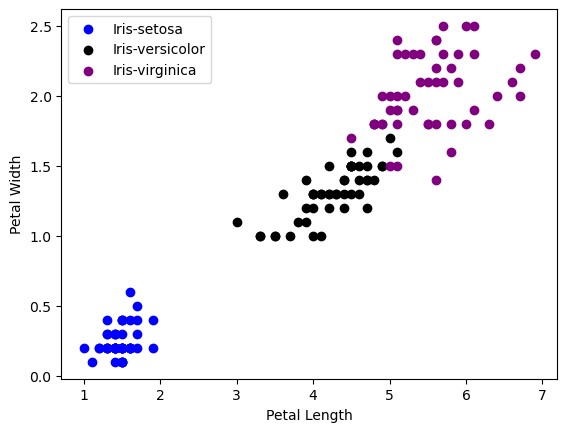

In [26]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     

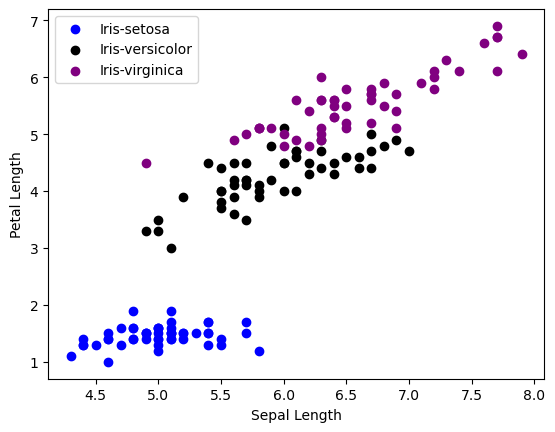

In [27]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

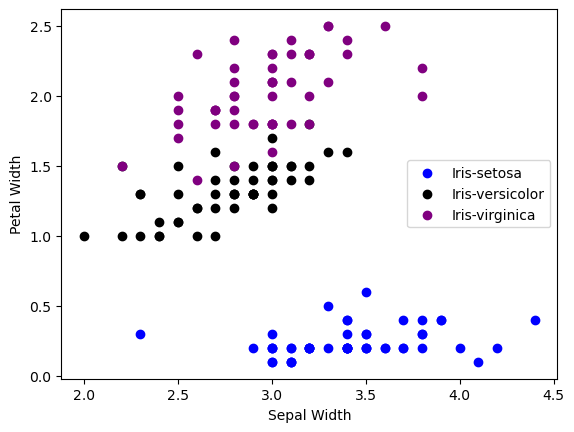

In [28]:
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()
     


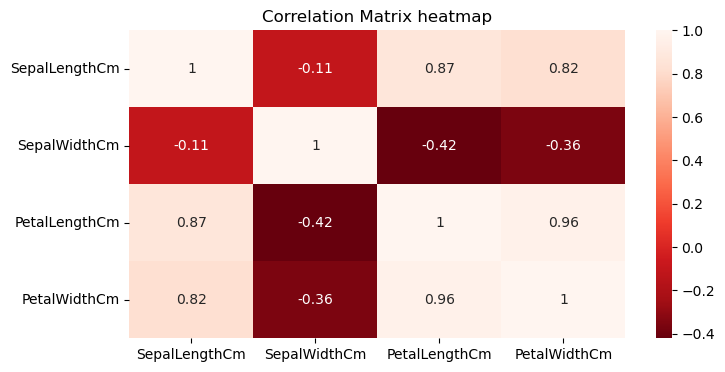

In [29]:
# First, filter out non-numeric columns or convert categorical data
# Option 1: Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_data.corr()

# Option 2: If you need to keep categorical data like 'Iris-setosa', convert it to numeric
# data_encoded = pd.get_dummies(data)  # One-hot encode categorical variables
# corr_matrix = data_encoded.corr()

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')

# Setting Labels
plt.title('Correlation Matrix heatmap')

# Display Chart
plt.show()


In [30]:
# Encode the categorical columns
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
data['Species'] = le.fit_transform(data['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = data['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2
     

Encoded Species Values:
[0 1 2]


In [31]:
x=data.drop(columns=['Species'], axis=1)
y=data['Species']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [33]:
y_train.value_counts()

Species
2    37
0    36
1    32
Name: count, dtype: int64

In [34]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test
    '''

    # Fit the model to the training data.
    model.fit(x_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]
    return model_score
     

In [35]:
score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

In [43]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Confusion Matrix:


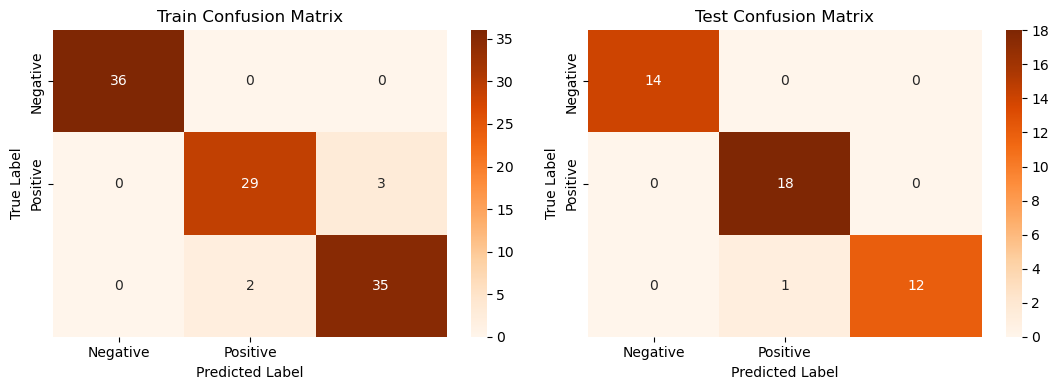


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  36        |
| 1            |    0.935484 | 0.90625  |   0.920635 |  32        |
| 2            |    0.921053 | 0.945946 |   0.933333 |  37        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.952179 | 0.950732 |   0.951323 | 105        |
| weighted avg |    0.952518 | 0.952381 |   0.95232  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 14        |
| 1            |    0.947368 | 1        |   0.972973 | 18        |
| 2            |    1        | 0.923077 |   0.96     | 13        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [37]:
lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)
     

In [38]:
score['Logistic regression'] = lr_score
score

,Logistic regression
Precision Train,0.952518
Precision Test,0.978947
Recall Train,0.952381
Recall Test,0.977778
Accuracy Train,0.952381
Accuracy Test,0.977778
F1 macro Train,0.952320
F1 macro Test,0.977634
